<a href="https://colab.research.google.com/github/subo1101/subodhini_dsml_projects/blob/main/Funding_in_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Date Preprocessing

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('/content/investments_VC.csv', encoding='latin-1')

In [203]:
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,01-06-2012,2012-06,2012-Q2,2012.0,30-06-2012,30-06-2012,1750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,04-06-2010,23-09-2010,0,4000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,26-10-2012,2012-10,2012-Q4,2012.0,09-08-2012,09-08-2012,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,01-04-2011,2011-04,2011-Q2,2011.0,01-04-2011,01-04-2011,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2,01-01-2014,2014-01,2014-Q1,2014.0,17-08-2014,26-09-2014,0,0,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  int64  
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [205]:
df.rename(columns={' market ': 'market', ' funding_total_usd ': 'funding_total_usd'}, inplace=True)

In [206]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [207]:
df.duplicated().sum()

0

In [208]:
df.shape

(49438, 39)

In [209]:
(df.isna().sum()/df.shape[0])*100

,0
permalink,0.000000
name,0.002023
homepage_url,6.976415
category_list,8.012056
market,8.026215
funding_total_usd,0.000000
status,2.657875
country_code,10.665885
state_code,38.992273
region,10.665885


In [210]:
df[df['name'].isna()]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
28221,/organization/tell-it-in,NaN,http://tellitin10.com,|Startups|,Startups,"25,000",closed,NaN,NaN,NaN,NaN,1,01-10-2011,2011-10,2011-Q4,2011.0,01-03-2012,01-03-2012,25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
df.loc[df['name'].isna(), 'name'] = df.loc[df['name'].isna(), 'homepage_url'].str.split('/').str[-1]

In [212]:
df[~df['category_list'].isna() & df['market'].isna()]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
2546,/organization/anonabox,AnonaBox,http://anonabox.com/,|Consumer Electronics|,NaN,"6,00,000",operating,USA,CA,Sacramento Valley,Chico,1,NaN,NaN,NaN,NaN,16-10-2014,16-10-2014,0,0,0,0,0,0,0,0,0,0,0,0,600000,0,0,0,0,0,0,0,0
9174,/organization/cognea,Cognea,http://www.cognea.com,|Pervasive Computing|Startups|,NaN,-,acquired,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,07-03-2014,07-03-2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11735,/organization/digitalcade,Digitalcade,http://www.digitalcade.com,|Entertainment|Skill Gaming|Mobile|,NaN,"1,00,000",operating,NaN,NaN,NaN,NaN,1,01-03-2012,2012-03,2012-Q1,2012.0,27-10-2014,27-10-2014,0,0,0,0,0,0,100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18973,/organization/high-brew-coffee,High Brew Coffee,http://highbrewcoffee.com,|Consumer Goods|Coffee|Brewing|,NaN,"44,00,000",operating,USA,TX,Austin,Austin,1,01-01-2013,2013-01,2013-Q1,2013.0,28-08-2014,28-08-2014,0,4400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22974,/organization/klique,Klique,http://www.klique.com,|Group Email|Group SMS|Social Media|,NaN,"20,75,000",operating,USA,FL,"Naples, Florida",Naples,1,01-01-2013,2013-01,2013-Q1,2013.0,07-04-2014,07-04-2014,0,0,0,0,0,2075000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43167,/organization/three-spires-brewing-co,Three Spires Brewing Co,http://www.threespiresbrewing.com,|Brewing|,NaN,"30,000",operating,NaN,NaN,NaN,NaN,1,01-10-2013,2013-10,2013-Q4,2013.0,25-02-2014,25-02-2014,0,0,0,30000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44766,/organization/ubalo,Ubalo,http://ubalo.com,|Cloud Computing|Pervasive Computing|,NaN,-,acquired,NaN,NaN,NaN,NaN,1,01-01-2011,2011-01,2011-Q1,2011.0,01-01-2012,01-01-2012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [213]:
df.loc[~df['category_list'].isna() & df['market'].isna(), 'market'] = df.loc[~df['category_list'].isna() & df['market'].isna(), 'category_list'].str.split('|').str[1]

In [214]:
df[df['state_code'].isna()]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,26-10-2012,2012-10,2012-Q4,2012.0,09-08-2012,09-08-2012,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,01-04-2011,2011-04,2011-Q2,2011.0,01-04-2011,01-04-2011,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,Buenos Aires,1,NaN,NaN,NaN,NaN,16-01-2007,16-01-2007,0,0,0,4912393,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,NaN,1,01-01-2007,2007-01,2007-Q1,2007.0,19-03-2008,19-03-2008,0,2000000,0,0,0,0,0,0,0,0,0,0,0,2000000,0,0,0,0,0,0,0
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,NaN,NaN,NaN,01-07-2014,01-07-2014,41250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,"26,86,600",operating,AUT,NaN,Vienna,Gerasdorf Bei Wien,1,01-01-2007,2007-01,2007-Q1,2007.0,29-01-2013,29-01-2013,0,2686600,0,0,0,0,0,0,0,0,0,0,0,2686600,0,0,0,0,0,0,0
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,"3,20,000",operating,GBR,NaN,London,London,1,28-01-2013,2013-01,2013-Q1,2013.0,24-03-2014,24-03-2014,320000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49434,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,"15,87,301",operating,CHN,NaN,Beijing,Beijing,1,NaN,NaN,NaN,NaN,01-04-2012,01-04-2012,0,1587301,0,0,0,0,0,0,0,0,0,0,0,1587301,0,0,0,0,0,0,0
49435,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,"97,398",operating,HRV,NaN,Split,Split,5,13-05-2012,2012-05,2012-Q2,2012.0,01-11-2011,10-09-2014,71525,0,0,0,25873,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [215]:
df[df['region'] == 'Hong Kong']['state_code'].value_counts()

,count
state_code,


In [216]:
pd.set_option('display.max_columns', None)
df[~df['founded_at'].isna() & df['founded_month'].isna()]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
1457,/organization/ag-p,AG&P,http://agp.ph,|Clean Technology|,Clean Technology,"14,40,00,000",operating,PHL,NaN,PHL - Other,Muntinlupa City,2,01-01-1900,NaN,NaN,NaN,03-06-2013,02-07-2013,0,53000000,0,0,0,91000000,0,0,0,0,0,0,0,0,0,53000000,0,0,0,0,0
2253,/organization/american-red-cross,American Red Cross,http://redcross.org,|Nonprofits|,Nonprofits,"5,500",operating,USA,DC,"Washington, D.C.",Washington,1,1881-05-01,NaN,NaN,NaN,22-01-2014,22-01-2014,0,0,0,0,0,0,0,5500,0,0,0,0,0,0,0,0,0,0,0,0,0
3221,/organization/arizona-state-university,Arizona State University,http://www.asu.edu/,|Nonprofits|Universities|Education|,Universities,"10,00,000",operating,USA,AZ,Phoenix,Tempe,1,1885-02-26,NaN,NaN,NaN,13-02-2014,13-02-2014,0,0,0,0,0,0,0,1000000,0,0,0,0,0,0,0,0,0,0,0,0,0
3439,/organization/asia-pacific-marine-container-lines,Asia Pacific Marine Container Lines,http://AsiaPacificMarine.com,|Logistics Company|Shipping Broker Industry|Sh...,Logistics Company,-,operating,CAN,BC,Vancouver,Vancouver,1,1870-01-05,NaN,NaN,NaN,01-09-1998,01-09-1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3571,/organization/athenix,Athenix,http://www.athenixcorp.com,|Biotechnology|,Biotechnology,"4,35,00,000",acquired,USA,NC,Raleigh,Raleigh,4,1863-01-01,NaN,NaN,NaN,10-09-2001,23-07-2008,0,43500000,0,0,0,0,0,0,0,0,0,0,0,8000000,12500000,13000000,10000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47244,/organization/wegame,WeGame,http://www.WeGame.com,|Social Media|,Social Media,"35,00,000",acquired,USA,CA,SF Bay Area,San Francisco,2,1840-01-01,NaN,NaN,NaN,01-10-2007,01-03-2008,500000,3000000,0,0,0,0,0,0,0,0,0,0,0,3000000,0,0,0,0,0,0,0
47595,/organization/wilberforce-university,Wilberforce University,http://www.wilberforce.edu/,NaN,NaN,"20,00,000",operating,USA,OH,Dayton,Wilberforce,1,1856-01-01,NaN,NaN,NaN,30-07-2014,30-07-2014,0,0,0,0,0,0,0,2000000,0,0,0,0,0,0,0,0,0,0,0,0,0
47880,/organization/worcester-polytechnic-institute,Worcester Polytechnic Institute,http://www.wpi.edu,|Education|,Education,"77,00,000",operating,USA,MA,Worcester,Worcester,4,1865-01-01,NaN,NaN,NaN,05-01-2010,23-08-2012,0,0,0,0,0,0,0,7700000,0,0,0,0,0,0,0,0,0,0,0,0,0
48135,/organization/xavier-university,Xavier University,http://www.xavier.edu/,NaN,NaN,"1,90,00,000",operating,USA,OH,Cincinnati,Cincinnati,1,1831-01-01,NaN,NaN,NaN,23-10-2014,23-10-2014,0,0,0,0,0,0,0,19000000,0,0,0,0,0,0,0,0,0,0,0,0,0


In [217]:
df['founded_at'].head()

,founded_at
0,01-06-2012
1,NaN
2,26-10-2012
3,01-04-2011
4,01-01-2014


In [218]:
missing_values = df.isna().sum()
columns_with_missing = missing_values[missing_values > 0].index.tolist()
columns_with_missing

['homepage_url',
 'category_list',
 'market',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'founded_at',
 'founded_month',
 'founded_quarter',
 'founded_year']

In [219]:
for i in columns_with_missing[:-1]:
    df[i] = df[i].fillna("Not Specified")

In [220]:
df[columns_with_missing[-1]] = df[columns_with_missing[-1]].fillna(df['first_funding_at'])
df['founded_at'] = pd.to_datetime(df['founded_at'], format='mixed', errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='mixed', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='mixed', errors='coerce')

In [221]:
df.isna().sum().sum()

10887

In [222]:
df[['founded_at', 'first_funding_at', 'last_funding_at']] = df[['founded_at', 'first_funding_at', 'last_funding_at']].fillna('01-01-1900')

In [223]:
df['founded_month'] = df['founded_at'].dt.month
df['founded_quarter'] = df['founded_at'].dt.quarter
df['founded_year'] = df['founded_at'].dt.year

In [224]:
df.isna().sum().sum()

0

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   permalink             49438 non-null  object        
 1   name                  49438 non-null  object        
 2   homepage_url          49438 non-null  object        
 3   category_list         49438 non-null  object        
 4   market                49438 non-null  object        
 5   funding_total_usd     49438 non-null  object        
 6   status                49438 non-null  object        
 7   country_code          49438 non-null  object        
 8   state_code            49438 non-null  object        
 9   region                49438 non-null  object        
 10  city                  49438 non-null  object        
 11  funding_rounds        49438 non-null  int64         
 12  founded_at            49438 non-null  datetime64[ns]
 13  founded_month   

In [226]:
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '')
df['funding_total_usd'] = df['funding_total_usd'].str.replace('$', '')
df['funding_total_usd'] = df['funding_total_usd'].str.replace('N/A', '0')
df['funding_total_usd'] = df['funding_total_usd'].str.replace(' -   ', '0')
df['funding_total_usd'] = df['funding_total_usd'].astype(float)

In [227]:
df.drop(['permalink', 'homepage_url'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()


,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012-01-06,1,1,2012,2012-06-30,2012-06-30,1750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,1900-01-01,1,1,1900,2010-04-06,2010-09-23,0,4000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,Not Specified,Tallinn,Tallinn,1,2012-10-26,10,4,2012,2012-09-08,2012-09-08,40000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,Not Specified,London,London,1,2011-01-04,1,1,2011,2011-01-04,2011-01-04,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014-01-01,1,1,2014,2014-08-17,2014-09-26,0,0,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Insights:
1. The dataset contains 49,438 records and 39 columns.
2. There are no duplicate records in this dataset.
3. The date columns have been successfully converted to the date format.
4. Several columns contain missing values as follows:
        *   homepage_url  ~ 7%
        *   category_list ~ 8%
        *   market ~ 7%
        *   status ~ 2.7%
        *   country_code ~ 10.7%
        *   state_code ~ 39%
        *   region ~ 10.7%
        *   city ~ 12.4%
        *   founded_at ~22%
        *   founded_month ~ 22.2%
        *   founded_quarter ~ 22.2%
        *   founded_year ~ 22.2%

   
    

##EDA

In [228]:
df.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [229]:
df.head(2)

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012-01-06,1,1,2012,2012-06-30,2012-06-30,1750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,1900-01-01,1,1,1900,2010-04-06,2010-09-23,0,4000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [230]:
df.describe()

,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,4.943800e+04,49438.000000,49438,49438.000000,49438.000000,49438.000000,49438,49438,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.316667e+07,1.696205,1983-08-09 12:14:04.111816832,1.868057,1.239350,1983.522291,2011-02-08 14:31:29.493911296,2011-12-23 00:48:35.069379840,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,1.628453e+05,2.074286e+06,6.088736e+05,4.434360e+05,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
min,0.000000e+00,1.000000,1785-01-01 00:00:00,1.000000,1.000000,1785.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+04,1.000000,1993-01-01 00:00:00,1.000000,1.000000,1993.000000,2009-07-21 00:00:00,2010-10-05 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+06,1.000000,2008-01-01 00:00:00,1.000000,1.000000,2008.000000,2011-12-12 00:00:00,2012-12-09 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.772162e+06,2.000000,2011-01-09 00:00:00,1.000000,1.000000,2011.000000,2013-06-24 00:00:00,2014-01-08 00:00:00,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.000000,2014-12-13 00:00:00,12.000000,4.000000,2014.000000,2020-11-19 00:00:00,2015-01-01 00:00:00,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08
std,1.535540e+08,1.294213,NaN,2.426575,0.712809,45.196128,NaN,NaN,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,5.612088e+06,3.167231e+07,2.678348e+07,3.428169e+07,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06


In [231]:
col = ['funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
 'private_equity', 'post_ipo_equity', 'post_ipo_debt',
 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

for i in col:
    df[i] = df[i] / 1000000

In [232]:
df.describe()

,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,49438.000000,49438.000000,49438,49438.000000,49438.000000,49438.000000,49438,49438,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000,49438.000000
mean,13.166667,1.696205,1983-08-09 12:14:04.111816832,1.868057,1.239350,1983.522291,2011-02-08 14:31:29.493911296,2011-12-23 00:48:35.069379840,0.217321,7.501051,0.006163,0.130221,0.023364,1.888157,0.065419,0.162845,2.074286,0.608874,0.443436,0.038456,0.007074,1.243955,1.492891,1.205356,0.737526,0.342468,0.169769,0.057671,0.014232
min,0.000000,1.000000,1785-01-01 00:00:00,1.000000,1.000000,1785.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,1.000000,1993-01-01 00:00:00,1.000000,1.000000,1993.000000,2009-07-21 00:00:00,2010-10-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2008-01-01 00:00:00,1.000000,1.000000,2008.000000,2011-12-12 00:00:00,2012-12-09 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.772163,2.000000,2011-01-09 00:00:00,1.000000,1.000000,2011.000000,2013-06-24 00:00:00,2014-01-08 00:00:00,0.025000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30079.503000,18.000000,2014-12-13 00:00:00,12.000000,4.000000,2014.000000,2020-11-19 00:00:00,2015-01-01 00:00:00,130.000000,2351.000000,25.000000,292.432833,300.000000,30079.503000,63.590263,750.500000,3500.000000,4700.000000,5800.000000,680.611554,72.000000,319.000000,542.000000,490.000000,1200.000000,400.000000,1060.000000,1000.000000,600.000000
std,153.554014,1.294213,NaN,2.426575,0.712809,45.196128,NaN,NaN,1.056985,28.471124,0.199905,2.981404,1.432046,138.204566,0.658291,5.612088,31.672313,26.783481,34.281690,3.864461,0.428217,5.531974,7.472704,7.993592,9.815218,5.406915,6.277905,5.252312,2.716865


In [233]:
df.describe(include=object)

,name,category_list,market,status,country_code,state_code,region,city
count,49438,49438,49438,49438,49438,49438,49438,49438
unique,49351,16676,761,4,116,62,1090,4189
top,Roost,Not Specified,Software,operating,USA,Not Specified,SF Bay Area,Not Specified
freq,4,3961,4620,41829,28793,19277,6804,6116


## Insights:
1. The dataset shows a vibrant funding landscape with substantial investment potential across various sources.

2. The funding with the highest value is debt financing, with a maximum of  30.08B.Following that,total funding also reaches 30.08B, indicating substantial investments in certain companies. Other significant values include venture funding at  2.35B and private equityat 3.5B.

3. The least funding types in the dataset include equity crowdfunding at  25M,convertible notes at 300M, angel funding at  63.59M,and seed funding at 130M.

4. Most companies are operating with a significant concentration in the USA, particularly in the SF Bay Area.

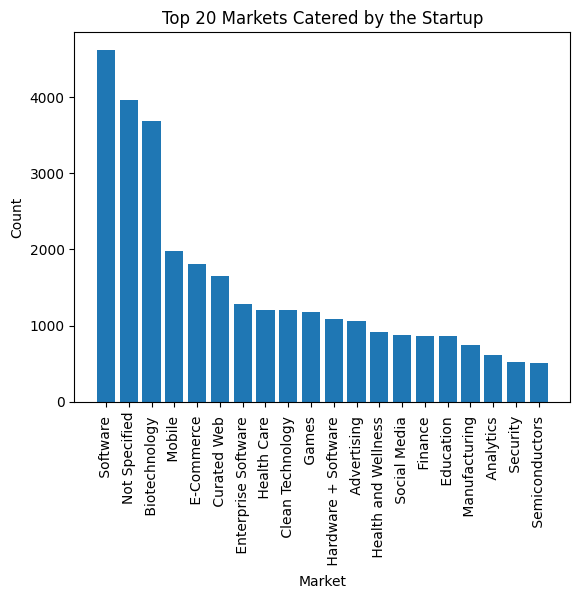

In [234]:
market_count = df['market'].value_counts().head(20)
plt.bar(market_count.index, market_count.values)
plt.xlabel('Market')
plt.ylabel('Count')
plt.title('Top 20 Markets Catered by the Startup')
plt.xticks(rotation=90)
plt.show()

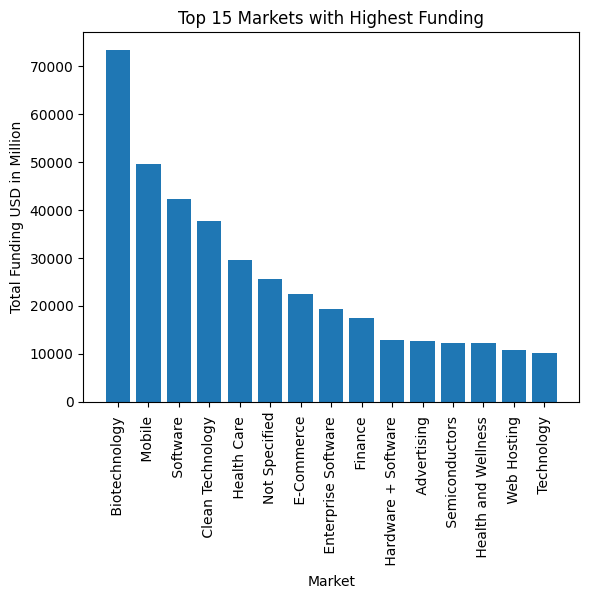

In [235]:
funded = df.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False).head(15)
plt.bar(funded.index, funded.values)
plt.xlabel('Market')
plt.ylabel('Total Funding USD in Million')
plt.title('Top 15 Markets with Highest Funding')
plt.xticks(rotation=90)
plt.show()

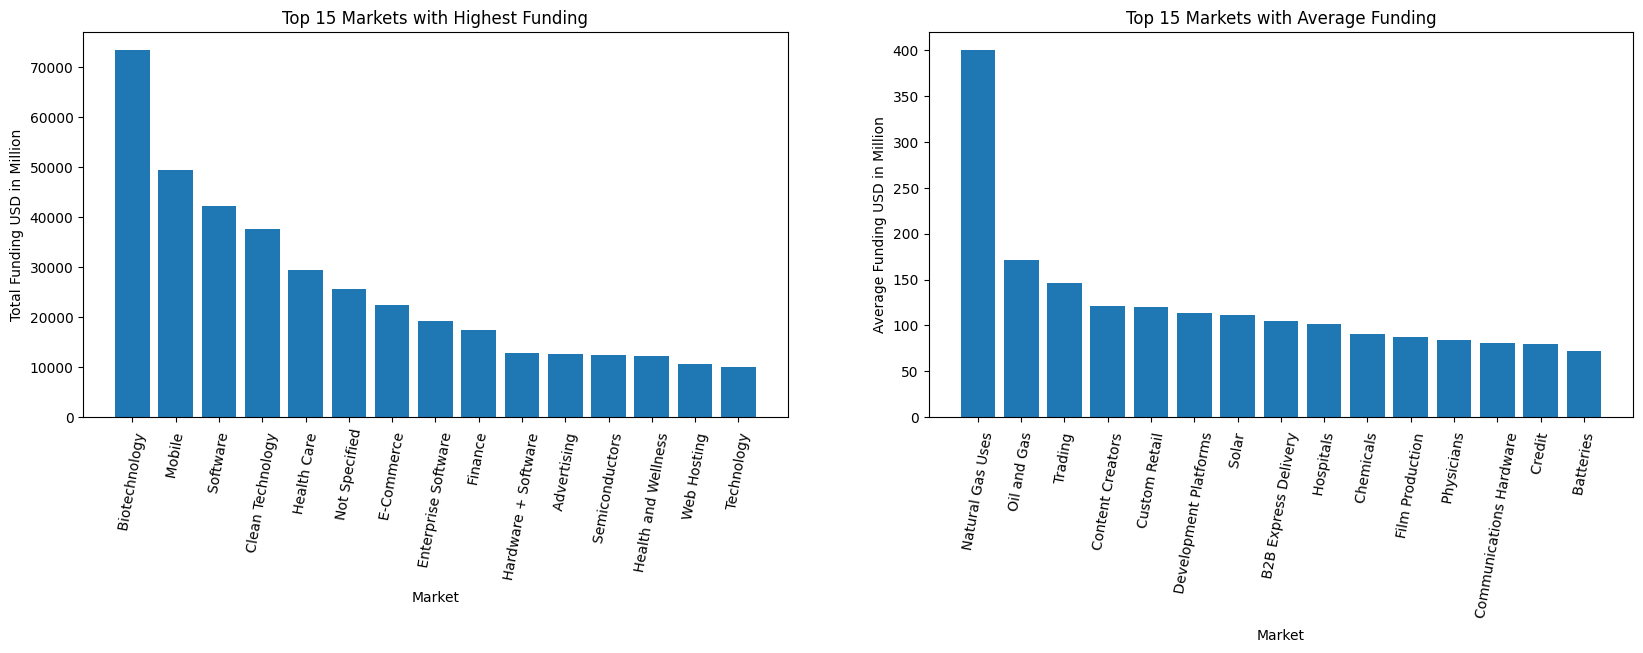

In [236]:
funded = df.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.bar(funded.index, funded.values)
plt.xlabel('Market')
plt.ylabel('Total Funding USD in Million')
plt.title('Top 15 Markets with Highest Funding')
plt.xticks(rotation=80)


plt.subplot(1,2,2)
funded = df.groupby('market')['funding_total_usd'].mean().sort_values(ascending=False).head(15)
plt.bar(funded.index, funded.values)
plt.xlabel('Market')
plt.ylabel('Average Funding USD in Million')
plt.title('Top 15 Markets with Average Funding')
plt.xticks(rotation=80)
plt.show()

In [237]:
df.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

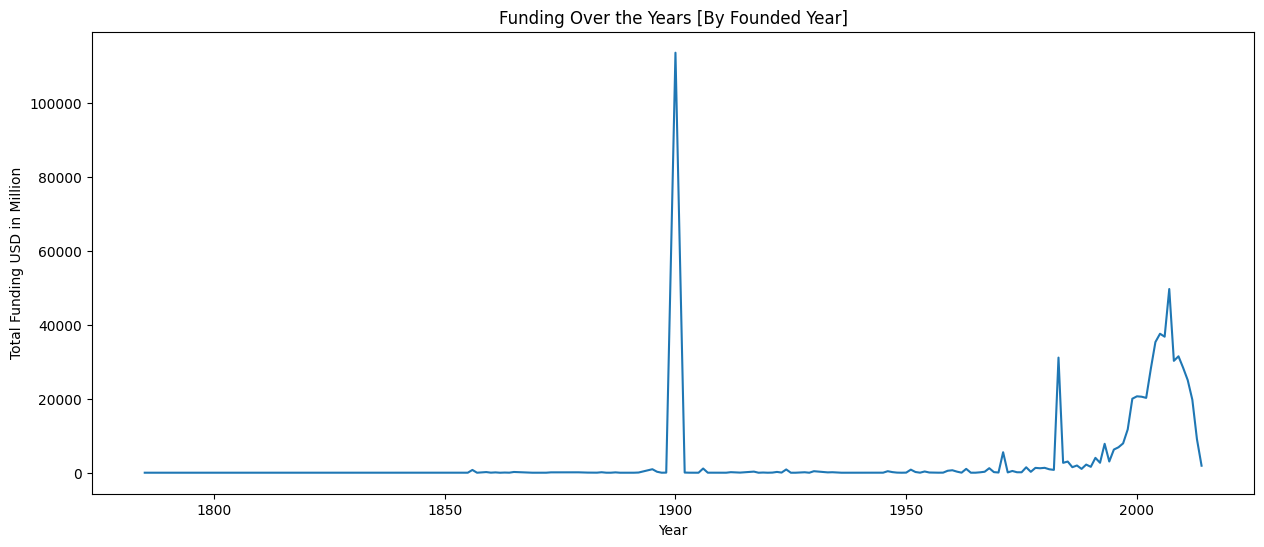

In [238]:
year_wise = df.groupby(df['founded_year'])['funding_total_usd'].sum()

plt.figure(figsize=(15, 6))
plt.plot(year_wise.index, year_wise.values)
plt.xlabel('Year')
plt.ylabel('Total Funding USD in Million')
plt.title('Funding Over the Years [By Founded Year]')
plt.show()

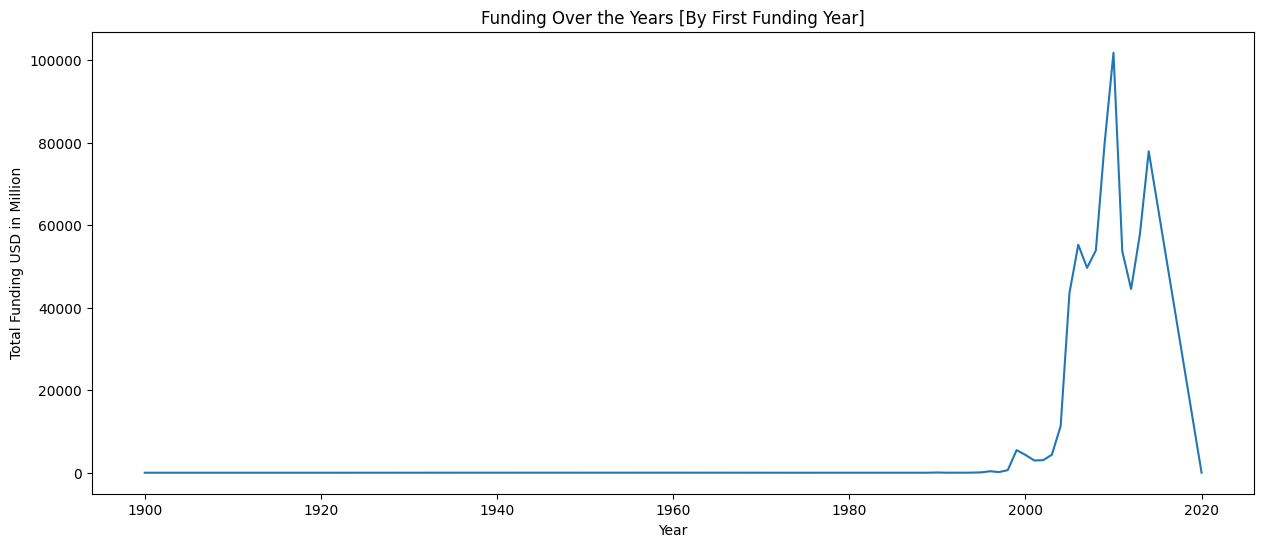

In [239]:
year_wise = df.groupby(df['first_funding_at'].dt.year)['funding_total_usd'].sum()

plt.figure(figsize=(15, 6))
plt.plot(year_wise.index, year_wise.values)
plt.xlabel('Year')
plt.ylabel('Total Funding USD in Million')
plt.title('Funding Over the Years [By First Funding Year]')
plt.show()

In [240]:
year_wise.reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
first_funding_at,1900.0,1921.000,1960.00000,1973.0,1974.0,1979.0,1982.000,1983.000,1984.0,1985.000,1986.0,1987.000,1988.0,1989.000,1990.00,1991.0,1992.000,1993.000,1994.00,1995.0,1996.000000,1997.00,1998.000000,1999.000000,2000.000000,2001.000000,2002.000000,2003.000000,2004.00000,2005.000000,2006.000000,2007.000000,2008.0000,2009.00000,2010.00000,2011.000000,2012.000000,2013.00000,2014.000000,2020.0
funding_total_usd,0.0,0.001,14.86103,0.0,0.0,1.0,1.044,0.094,0.1,2.236,0.0,2.976,0.0,0.015,56.01,0.0,15.721,0.125,31.75,87.3,362.486633,148.35,644.986778,5477.013266,4317.576575,2976.978193,3031.778968,4355.188229,11308.52225,43557.438217,55246.901683,49650.601196,53909.9936,80031.23719,101792.48548,53657.666793,44527.418688,57814.86111,77908.985265,0.0


<Axes: xlabel='funding_total_usd', ylabel='Count'>

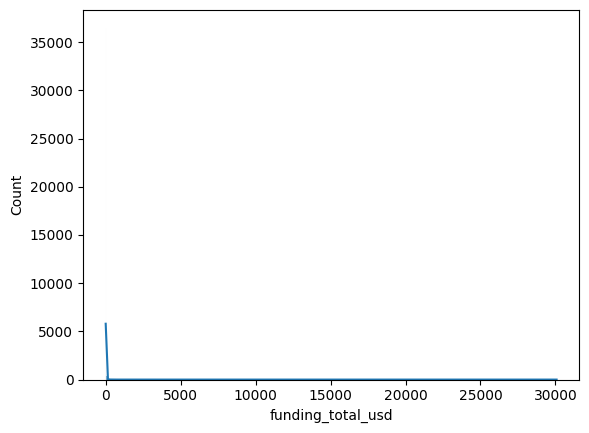

In [241]:
sns.histplot(df['funding_total_usd'], kde=True, bins=5000)


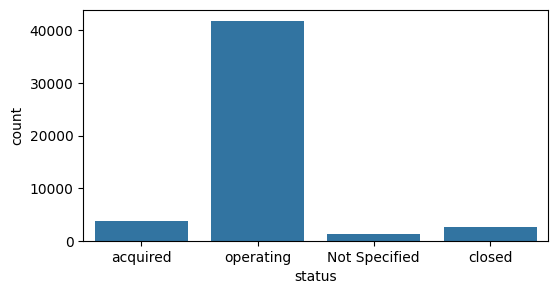

In [242]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='status')
plt.show()

In [243]:
df['funding_total_usd'].value_counts()

,count
funding_total_usd,
0.000000,8531
1.000000,925
0.500000,761
0.100000,749
0.040000,680
...,...
17.926365,1
0.177404,1
0.252052,1


In [244]:
no_funding = df[df['funding_total_usd'] <=0].reset_index(drop=True)
df = df[df['funding_total_usd'] > 0].reset_index(drop=True)
no_funding.head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,004 Technologies,|Software|,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,1,1,2010,2014-07-24,2014-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1-4 All,|Entertainment|Games|Software|,Software,0.0,operating,USA,NC,NC - Other,Connellys Springs,1,1900-01-01,1,1,1900,2013-04-21,2013-04-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1-800-DENTIST,|Health and Wellness|,Health and Wellness,0.0,operating,USA,CA,Los Angeles,Los Angeles,1,1986-01-01,1,1,1986,2010-08-19,2010-08-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.618 Technology,|Real Estate|,Real Estate,0.0,operating,USA,FL,Orlando,Orlando,1,2013-07-12,7,3,2013,2014-01-22,2014-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000jobboersen.de,|Curated Web|,Curated Web,0.0,operating,DEU,Not Specified,Berlin,Berlin,1,1900-01-01,1,1,1900,2011-09-16,2011-09-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
round((no_funding['status'].value_counts()/no_funding.shape[0])*100, 2)

,count
status,
operating,86.78
acquired,5.56
closed,5.22
Not Specified,2.45


In [246]:
no_funding.describe(include=object)

,name,category_list,market,status,country_code,state_code,region,city
count,8531,8531,8531,8531,8531,8531,8531,8531
unique,8528,2935,546,4,85,61,627,1827
top,Roadmap,Not Specified,Not Specified,operating,USA,Not Specified,Not Specified,Not Specified
freq,2,1458,1458,7403,4316,3989,1454,1611


In [247]:
no_funding.drop(columns=['first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'], inplace=True)

In [248]:
no_funding['founded_year'].value_counts().reset_index(),  df['founded_year'].value_counts().reset_index()

(    founded_year  count
 0           1900   2178
 1           2012    977
 2           2013    881
 3           2011    860
 4           2010    607
 ..           ...    ...
 70          1922      1
 71          1863      1
 72          1945      1
 73          1870      1
 74          1850      1
 
 [75 rows x 2 columns],
      founded_year  count
 0            1900   8711
 1            2012   4234
 2            2011   4045
 3            2010   3166
 4            2013   3163
 ..            ...    ...
 137          1845      1
 138          1855      1
 139          1920      1
 140          1925      1
 141          1831      1
 
 [142 rows x 2 columns])

In [249]:
no_funding['market'].value_counts().head(10).reset_index(), df['market'].value_counts().head(10).reset_index()

(            market  count
 0    Not Specified   1458
 1        Software     570
 2      E-Commerce     344
 3     Curated Web     319
 4          Mobile     273
 5           Games     225
 6   Manufacturing     186
 7   Biotechnology     167
 8      Consulting     167
 9         Finance     159,
                   market  count
 0              Software    4050
 1         Biotechnology    3521
 2          Not Specified   2503
 3                Mobile    1710
 4            E-Commerce    1461
 5           Curated Web    1336
 6   Enterprise Software    1137
 7           Health Care    1114
 8      Clean Technology    1067
 9   Hardware + Software     994)

In [250]:
no_funding['country_code'].value_counts().head(10).reset_index(), df['country_code'].value_counts().head(10).reset_index()

(    country_code  count
 0            USA   4316
 1  Not Specified   1454
 2            GBR    358
 3            DEU    341
 4            CHN    251
 5            CAN    240
 6            IND    206
 7            FRA    100
 8            NLD     92
 9            ESP     87,
     country_code  count
 0            USA  24477
 1  Not Specified   3819
 2            GBR   2284
 3            CAN   1165
 4            CHN    988
 5            FRA    766
 6            IND    643
 7            DEU    627
 8            ISR    601
 9            ESP    462)

##Insights: No Funding companies
1. There are 8,531 companies that have not raised any funds. 86.78% of companies are in operating status, while the remaining are either acquired or closed, distributed equally. Additionally, 2.45% of companies have not disclosed their status.
2. Many companies without funding were founded in recent years, particularly in 2012, 2011, and 2013. This suggests they might be bootstrapping or have enough resources to operate independently for now. Alternatively, it could indicate they are struggling to secure investment but may seek funding in the future.
3. 17% of companies did not disclose their market type, while 6.68% cater to the software market. E-commerce and curated web markets follow closely behind.


In [251]:
df['funding_total_usd'].describe()

,funding_total_usd
count,40907.000000
mean,15.912526
std,168.678800
min,0.000001
25%,0.350000
50%,2.000000
75%,10.000000
max,30079.503000


In [252]:

# Define bins and refined labels
bins = [0, 1, 10, 50, 100, 1000, 10000, float('inf')]
labels = ['Seed Stage', 'Early Stage', 'Growth Stage', 'Expansion Stage', 'Late Stage', 'Unicorn', 'Decacorn and Beyond']

# Create a new column with funding categories
df['funding_category'] = pd.cut(df['funding_total_usd'], bins=bins, labels=labels)



In [253]:
df['funding_category'].value_counts()

,count
funding_category,
Seed Stage,16326
Early Stage,14828
Growth Stage,7261
Expansion Stage,1467
Late Stage,993
Unicorn,31
Decacorn and Beyond,1


##Decacorn and Beyond

In [254]:
df[df['funding_category'] == 'Decacorn and Beyond']

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_category
37896,Verizon Communications,|Mobile|,Mobile,30079.503,operating,USA,NY,New York City,New York,5,1983-07-10,7,3,1983,2010-01-26,2014-02-28,0.0,0.0,0.0,0.0,0.0,30079.503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Decacorn and Beyond


##Unicorn

In [255]:
df[df['funding_category'] == 'Unicorn'].describe()

,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,31.000000,31.000000,31,31.000000,31.000000,31.000000,31,31,31.000000,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2030.204161,4.451613,1982-08-26 12:23:13.548387072,2.129032,1.322581,1982.548387,2009-12-30 14:42:34.838709760,2012-12-01 22:27:05.806451712,0.006935,307.128366,0.0,0.0,0.443193,471.988526,0.254516,0.0,468.503159,279.435917,489.540323,12.903226,0.0,1.990323,16.345161,41.548387,95.032258,25.456984,60.958065,45.161290,19.354839
min,1045.040000,1.000000,1900-01-01 00:00:00,1.000000,1.000000,1900.000000,1999-01-10 00:00:00,2005-11-08 00:00:00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1148.583255,1.000000,1980-12-31 12:00:00,1.000000,1.000000,1981.000000,2007-01-06 12:00:00,2011-11-06 12:00:00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1498.515340,3.000000,2005-01-01 00:00:00,1.000000,1.000000,2005.000000,2009-03-16 00:00:00,2014-01-09 00:00:00,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2375.570000,8.000000,2007-01-03 12:00:00,1.000000,1.000000,2007.000000,2013-10-02 00:00:00,2014-06-05 00:00:00,0.000000,471.450000,0.0,0.0,0.000000,625.322159,0.000000,0.0,723.520000,0.000000,0.000000,0.000000,0.0,2.000000,11.000000,22.500000,57.500000,0.000000,0.000000,0.000000,0.000000
max,5800.000000,13.000000,2012-01-01 00:00:00,12.000000,4.000000,2012.000000,2014-09-25 00:00:00,2014-11-24 00:00:00,0.200000,2351.000000,0.0,0.0,13.738976,3200.000000,5.000000,0.0,3500.000000,4700.000000,5800.000000,400.000000,0.0,12.700000,250.000000,375.000000,1200.000000,360.000000,1060.000000,1000.000000,600.000000
std,1343.238704,3.758002,NaN,3.030313,0.908739,41.696394,NaN,NaN,0.035932,563.294633,0.0,0.0,2.467593,836.822647,0.927793,0.0,850.792930,914.391118,1265.330873,71.842121,0.0,3.822596,46.769219,100.249635,268.190291,75.269049,199.347204,191.204445,107.763181


In [256]:
df[df['funding_category'] == 'Unicorn'].describe(include=object)

,name,category_list,market,status,country_code,state_code,region,city
count,31,31,31,31,31,31,31,31
unique,31,27,26,3,6,13,23,27
top,Alibaba,|E-Commerce|,E-Commerce,operating,USA,Not Specified,SF Bay Area,San Francisco
freq,1,2,2,27,22,9,7,3


In [257]:
print("Unicorn:\n")
print("Top 5 Markets:")
print(df[df['funding_category'] == 'Unicorn']['market'].value_counts().head())
print("\nstatus:")
print(df[df['funding_category'] == 'Unicorn']['status'].value_counts().head())
print("\nTop 5 Country code:")
print(df[df['funding_category'] == 'Unicorn']['country_code'].value_counts().head())
print("\nTop 5 funding rounds:")
print(df[df['funding_category'] == 'Unicorn']['funding_rounds'].value_counts().head())
print("\nTop 5 founded year:")
print(df[df['funding_category'] == 'Unicorn']['founded_year'].value_counts().head())
print("\nTop 5 first funding in year:")
print(df[df['funding_category'] == 'Unicorn']['first_funding_at'].dt.year.value_counts().head())

Unicorn:

Top 5 Markets:
market
 E-Commerce              2
Not Specified            2
 Clean Technology        2
 Internet                2
 Enterprise Software     2
Name: count, dtype: int64

status:
status
operating    27
acquired      3
closed        1
Name: count, dtype: int64

Top 5 Country code:
country_code
USA    22
CHN     3
IND     3
NLD     1
RUS     1
Name: count, dtype: int64

Top 5 funding rounds:
funding_rounds
1    12
8     4
6     4
2     3
4     2
Name: count, dtype: int64

Top 5 founded year:
founded_year
1900    5
2007    5
2006    3
2008    3
1971    2
Name: count, dtype: int64

Top 5 first funding in year:
first_funding_at
2014    7
2009    6
2006    4
2013    3
2007    3
Name: count, dtype: int64


##Late Stage

In [258]:
df[df['funding_category'] == 'Late Stage'].describe()

,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,993.000000,993.000000,993,993.000000,993.000000,993.000000,993,993,993.000000,993.000000,993.0,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,223.266513,3.907351,1985-04-19 16:46:24.290030208,1.365559,1.101712,1985.263847,2009-05-18 21:04:31.903323136,2012-12-15 21:03:04.894259712,0.370546,94.313143,0.0,1.986898,0.398969,31.284616,0.091934,4.064609,67.252353,16.163017,5.875815,1.392107,0.072508,7.599206,14.828614,19.208778,16.882977,10.049344,4.808172,1.146001,0.050352
min,100.068430,1.000000,1856-01-01 00:00:00,1.000000,1.000000,1856.000000,1996-01-12 00:00:00,2000-06-27 00:00:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.842730,2.000000,1995-01-01 00:00:00,1.000000,1.000000,1995.000000,2007-01-05 00:00:00,2012-01-12 00:00:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,158.000000,3.000000,2003-01-01 00:00:00,1.000000,1.000000,2003.000000,2009-08-21 00:00:00,2013-10-13 00:00:00,0.000000,92.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,252.794435,6.000000,2007-01-01 00:00:00,1.000000,1.000000,2007.000000,2012-01-01 00:00:00,2014-05-28 00:00:00,0.000000,132.120261,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,109.516262,0.000000,0.000000,0.000000,0.000000,4.500000,16.000000,25.500000,20.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,18.000000,2014-10-03 00:00:00,12.000000,4.000000,2014.000000,2014-12-06 00:00:00,2014-12-11 00:00:00,130.000000,866.550786,0.0,292.432833,300.000000,940.000000,12.500000,750.500000,980.000000,1000.000000,800.000000,680.611554,72.000000,319.000000,542.000000,490.000000,475.000000,400.000000,250.000000,350.000000,50.000000
std,159.785050,2.715969,NaN,1.649261,0.484359,39.336366,NaN,NaN,5.630904,110.557040,0.0,17.934147,9.667812,101.934263,0.820621,37.604099,125.444545,86.719450,50.878269,24.015712,2.284851,26.512779,36.759587,38.119584,40.302722,31.348601,23.925047,13.831812,1.586702


In [259]:
df[df['funding_category'] == 'Late Stage'].sort_values(by='funding_total_usd', ascending=False)

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_category
4599,BlackBerry,|RIM|Wireless|Mobile|Hardware + Software|,Wireless,1000.000000,operating,CAN,ON,Toronto,Waterloo,1,1984-01-01,1,1,1984,2013-04-11,2013-04-11,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1000.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,Late Stage
2186,AOL,|Advertising Platforms|Content Creators|Digita...,Content Creators,1000.000000,operating,USA,NY,New York City,New York,1,1985-05-24,5,2,1985,2005-01-12,2005-01-12,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1000.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,Late Stage
4702,Bloom Energy,|Clean Technology|,Clean Technology,980.000000,operating,USA,CA,SF Bay Area,Sunnyvale,5,2001-01-01,1,1,2001,2008-01-01,2013-10-05,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,980.000000,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,Late Stage
25833,Palantir Technologies,|Analytics|,Analytics,949.975292,operating,USA,CA,SF Bay Area,Palo Alto,12,2004-01-01,1,1,2004,2005-01-09,2014-01-10,0.0,301.000000,0.0,0.0,0.0,8.291250,0.0,0.0,640.684042,0.0,0.0,0.0,0.0,0.00000,0.00,35.0,90.000000,50.0,70.0,56.000000,0.0,Late Stage
35328,The Exchange,|Politics|,Politics,940.000000,operating,USA,TX,Dallas,Dallas,3,1895-07-25,7,3,1895,2009-07-16,2012-02-04,0.0,0.000000,0.0,0.0,0.0,940.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,Late Stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20993,Marin Software,|Technology|Search Marketing|Advertising|,Technology,100.268406,operating,USA,CA,SF Bay Area,San Francisco,9,2006-01-04,1,1,2006,2006-05-10,2013-05-03,0.0,80.268427,0.0,0.0,0.0,0.000000,0.0,0.0,19.999979,0.0,0.0,0.0,0.0,2.00000,7.25,13.0,11.200000,16.0,30.0,0.818427,0.0,Late Stage
24079,Nextdoor,|Privacy|Social Media|,Privacy,100.200000,operating,USA,CA,SF Bay Area,San Francisco,3,2010-01-01,1,1,2010,2012-07-24,2013-10-29,0.0,100.200000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,18.60000,21.60,60.0,0.000000,0.0,0.0,0.000000,0.0,Late Stage
27593,Presidio Pharmaceuticals,|Biotechnology|,Biotechnology,100.183473,operating,USA,CA,SF Bay Area,San Francisco,6,2006-01-01,1,1,2006,2007-08-29,2014-06-16,0.0,97.183423,0.0,0.0,0.0,3.000050,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,26.00,0.0,21.827981,0.0,0.0,0.000000,0.0,Late Stage
8969,CymaBay Therapeutics,|Biotechnology|,Biotechnology,100.180695,operating,USA,CA,SF Bay Area,Hayward,5,1991-01-01,1,1,1991,2007-04-19,2013-11-12,0.0,67.433640,0.0,0.0,0.0,32.747055,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.00,0.0,32.000000,0.0,0.0,0.000000,0.0,Late Stage


In [260]:
df[df['funding_category'] == 'Late Stage'].describe(include=object)

,name,category_list,market,status,country_code,state_code,region,city
count,993,993,993,993,993,993,993,993
unique,991,422,190,4,39,41,162,356
top,Prysm,|Biotechnology|,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco
freq,2,120,135,847,712,324,229,58


In [261]:
print("Late Stage:\n")
print("Top 5 Markets:")
print(df[df['funding_category'] == 'Late Stage']['market'].value_counts().head())
print("\nstatus:")
print(df[df['funding_category'] == 'Late Stage']['status'].value_counts().head())
print("\nTop 5 Country code:")
print(df[df['funding_category'] == 'Late Stage']['country_code'].value_counts().head())
print("\nTop 5 funding rounds:")
print(df[df['funding_category'] == 'Late Stage']['funding_rounds'].value_counts().head())
print("\nTop 5 founded year:")
print(df[df['funding_category'] == 'Late Stage']['founded_year'].value_counts().head())
print("\nTop 5 first funding in year:")
print(df[df['funding_category'] == 'Late Stage']['first_funding_at'].dt.year.value_counts().head())

Late Stage:

Top 5 Markets:
market
Biotechnology        135
Clean Technology      90
Health Care           67
Software              49
E-Commerce            38
Name: count, dtype: int64

status:
status
operating        847
acquired          93
Not Specified     33
closed            20
Name: count, dtype: int64

Top 5 Country code:
country_code
USA              712
CHN               59
GBR               35
Not Specified     35
CAN               24
Name: count, dtype: int64

Top 5 funding rounds:
funding_rounds
1    247
2    138
3    127
5    114
4    108
Name: count, dtype: int64

Top 5 founded year:
founded_year
1900    157
2007     84
2004     74
2006     65
2005     61
Name: count, dtype: int64

Top 5 first funding in year:
first_funding_at
2010    128
2009    127
2006     96
2014     95
2007     90
Name: count, dtype: int64


##Expansion Stage

In [262]:
df[df['funding_category'] == 'Expansion Stage'].describe()

,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,1467.000000,1467.000000,1467,1467.000000,1467.000000,1467.000000,1467,1467,1467.000000,1467.000000,1467.0,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,70.877552,3.612134,1985-02-20 03:05:31.288343552,1.323790,1.089980,1985.107021,2009-01-07 03:23:11.411043072,2012-07-05 11:23:11.411042816,0.126934,52.967380,0.0,0.677326,0.088771,4.251234,0.108068,0.898780,9.184872,2.101156,0.390827,0.045121,0.037082,5.759623,11.196935,12.103303,6.247040,2.754873,0.848143,0.178028,0.033401
min,50.057463,1.000000,1861-04-10 00:00:00,1.000000,1.000000,1861.000000,1996-01-01 00:00:00,1998-01-12 00:00:00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,2.000000,1996-01-01 00:00:00,1.000000,1.000000,1996.000000,2006-10-25 12:00:00,2011-03-05 00:00:00,0.000000,44.816749,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,3.000000,2004-01-01 00:00:00,1.000000,1.000000,2004.000000,2009-04-29 00:00:00,2013-06-20 00:00:00,0.000000,58.100000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,81.816033,5.000000,2007-01-01 00:00:00,1.000000,1.000000,2007.000000,2011-04-12 00:00:00,2014-05-13 12:00:00,0.000000,72.289679,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,18.000000,20.050000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,15.000000,2014-01-01 00:00:00,12.000000,4.000000,2014.000000,2014-11-21 00:00:00,2014-12-11 00:00:00,15.000000,100.000000,0.0,100.000000,60.000000,100.000000,63.590263,98.038920,100.000000,100.000000,96.638207,60.000000,52.000000,100.000000,100.000000,100.000000,87.783861,100.000000,69.000000,73.667711,49.000000
std,14.648032,2.228169,NaN,1.535216,0.447917,40.169985,NaN,NaN,0.791704,28.789472,0.0,6.292629,1.889464,13.845038,1.899546,8.174627,24.493501,11.728364,5.191185,1.574732,1.359054,12.945131,16.525937,17.934591,13.250882,9.763972,5.300768,2.858541,1.279325


In [263]:
df[df['funding_category'] == 'Expansion Stage'].describe(include=object)

,name,category_list,market,status,country_code,state_code,region,city
count,1467,1467,1467,1467,1467,1467,1467,1467
unique,1467,554,221,4,40,52,217,449
top,1366 Technologies,|Biotechnology|,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco
freq,1,246,256,1175,1064,496,373,87


In [264]:
print("Expansion Stage:\n")
print("Top 5 Markets:")
print(df[df['funding_category'] == 'Expansion Stage']['market'].value_counts().head())
print("\nstatus:")
print(df[df['funding_category'] == 'Expansion Stage']['status'].value_counts().head())
print("\nTop 5 Country code:")
print(df[df['funding_category'] == 'Expansion Stage']['country_code'].value_counts().head())
print("\nTop 5 funding rounds:")
print(df[df['funding_category'] == 'Expansion Stage']['funding_rounds'].value_counts().head())
print("\nTop 5 founded year:")
print(df[df['funding_category'] == 'Expansion Stage']['founded_year'].value_counts().head())
print("\nTop 5 first funding in year:")
print(df[df['funding_category'] == 'Expansion Stage']['first_funding_at'].dt.year.value_counts().head())

Expansion Stage:

Top 5 Markets:
market
Biotechnology        256
Health Care           99
Software              90
Clean Technology      74
Semiconductors        53
Name: count, dtype: int64

status:
status
operating        1175
acquired          217
closed             46
Not Specified      29
Name: count, dtype: int64

Top 5 Country code:
country_code
USA              1064
CHN                74
GBR                67
Not Specified      63
CAN                31
Name: count, dtype: int64

Top 5 funding rounds:
funding_rounds
1    300
4    255
3    254
2    220
5    177
Name: count, dtype: int64

Top 5 founded year:
founded_year
1900    252
2006    115
2005    111
2007    104
2004     96
Name: count, dtype: int64

Top 5 first funding in year:
first_funding_at
2009    206
2010    179
2007    146
2006    145
2008    136
Name: count, dtype: int64


##Growth Stage

In [265]:
df[df['funding_category'] == 'Growth Stage'].describe()

,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,7261.000000,7261.000000,7261,7261.000000,7261.000000,7261.000000,7261,7261,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000
mean,23.070923,2.578846,1983-03-24 00:19:02.321994176,1.341964,1.093789,1983.191021,2009-08-07 08:18:34.557223680,2011-10-17 09:48:48.687508736,0.199914,19.763791,0.012842,0.319536,0.035705,1.165120,0.107356,0.219622,0.906149,0.283992,0.039318,0.006454,0.011123,3.936340,4.998330,2.753518,0.975645,0.274092,0.060741,0.006148,0.000634
min,10.000001,1.000000,1831-01-01 00:00:00,1.000000,1.000000,1831.000000,1960-01-01 00:00:00,1994-12-02 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1.000000,1994-01-01 00:00:00,1.000000,1.000000,1994.000000,2007-01-12 00:00:00,2010-01-13 00:00:00,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,2.000000,2004-01-01 00:00:00,1.000000,1.000000,2004.000000,2010-01-01 00:00:00,2012-09-03 00:00:00,0.000000,17.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,3.000000,2008-01-01 00:00:00,1.000000,1.000000,2008.000000,2012-01-06 00:00:00,2014-02-19 00:00:00,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,15.000000,2014-12-06 00:00:00,12.000000,4.000000,2014.000000,2014-12-11 00:00:00,2014-12-11 00:00:00,25.000000,50.000000,25.000000,50.000000,25.000000,50.000000,43.923865,50.000000,50.000000,48.700000,35.000000,19.300000,14.600000,50.000000,50.000000,50.000000,50.000000,35.000000,50.000000,26.000000,4.600000
std,10.789168,1.640320,NaN,1.581570,0.461631,42.443737,NaN,NaN,1.019822,11.899579,0.442885,2.685356,0.544369,4.558946,1.220924,2.176643,4.801201,2.588556,0.949485,0.297360,0.324131,6.855582,7.778388,6.608489,4.272990,2.150292,1.125906,0.337457,0.053983


In [266]:
df[df['funding_category'] == 'Growth Stage'].describe(include=object)

,name,category_list,market,status,country_code,state_code,region,city
count,7261,7261,7261,7261,7261,7261,7261,7261
unique,7258,2316,462,4,62,56,464,1162
top,Shift,|Biotechnology|,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco
freq,2,950,972,5670,5098,2116,1590,463


In [267]:
print("Growth Stage:\n")
print("Top 5 Markets:")
print(df[df['funding_category'] == 'Growth Stage']['market'].value_counts().head())
print("\nstatus:")
print(df[df['funding_category'] == 'Growth Stage']['status'].value_counts().head())
print("\nTop 5 Country code:")
print(df[df['funding_category'] == 'Growth Stage']['country_code'].value_counts().head())
print("\nTop 5 funding rounds:")
print(df[df['funding_category'] == 'Growth Stage']['funding_rounds'].value_counts().head())
print("\nTop 5 founded year:")
print(df[df['funding_category'] == 'Growth Stage']['founded_year'].value_counts().head())
print("\nTop 5 first funding in year:")
print(df[df['funding_category'] == 'Growth Stage']['first_funding_at'].dt.year.value_counts().head())

Growth Stage:

Top 5 Markets:
market
Biotechnology           972
Software                726
Health Care             302
Mobile                  300
Enterprise Software     300
Name: count, dtype: int64

status:
status
operating        5670
acquired         1129
closed            289
Not Specified     173
Name: count, dtype: int64

Top 5 Country code:
country_code
USA              5098
GBR               348
CHN               328
Not Specified     324
CAN               195
Name: count, dtype: int64

Top 5 funding rounds:
funding_rounds
1    2242
2    1919
3    1408
4     850
5     433
Name: count, dtype: int64

Top 5 founded year:
founded_year
1900    1433
2007     476
2006     432
2011     417
2009     416
Name: count, dtype: int64

Top 5 first funding in year:
first_funding_at
2010    907
2011    853
2009    820
2006    695
2012    680
Name: count, dtype: int64


##Early Stage

In [268]:
df[df['funding_category'] == 'Early Stage'].describe()

,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,14828.000000,14828.000000,14828,14828.000000,14828.000000,14828.000000,14828,14828,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.000000,14828.0
mean,4.007700,1.743121,1981-08-19 13:13:36.725114688,1.599811,1.165295,1981.575465,2010-12-28 04:54:21.073644544,2011-11-23 02:34:24.634475520,0.436183,3.017920,0.009591,0.070510,0.020297,0.172579,0.107924,0.066982,0.078274,0.016097,0.003547,0.000331,0.007465,1.112960,0.392597,0.098616,0.033675,0.008782,0.002867,0.000495,0.0
min,1.000214,1.000000,1785-01-01 00:00:00,1.000000,1.000000,1785.000000,1985-09-19 00:00:00,1987-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.894613,1.000000,1986-01-01 00:00:00,1.000000,1.000000,1986.000000,2009-04-15 00:00:00,2010-04-14 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,3.200000,1.000000,2007-01-01 00:00:00,1.000000,1.000000,2007.000000,2011-06-17 00:00:00,2012-11-09 00:00:00,0.000000,2.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,5.700000,2.000000,2011-01-01 00:00:00,1.000000,1.000000,2011.000000,2013-04-10 00:00:00,2014-02-09 00:00:00,0.198533,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,10.000000,16.000000,2014-12-07 00:00:00,12.000000,4.000000,2014.000000,2014-12-11 00:00:00,2014-12-11 00:00:00,10.000000,10.000000,7.200000,10.000000,9.848758,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.700000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.000000,3.700000,0.0
std,2.560034,1.110553,NaN,2.056452,0.602700,45.950333,NaN,NaN,0.940308,2.884462,0.187238,0.600464,0.247199,0.775525,0.532915,0.590991,0.665581,0.302996,0.144127,0.038636,0.162844,2.133694,1.442206,0.784938,0.474057,0.240343,0.117704,0.042613,0.0


In [269]:
df[df['funding_category'] == 'Early Stage'].describe(include=object)

,name,category_list,market,status,country_code,state_code,region,city
count,14828,14828,14828,14828,14828,14828,14828,14828
unique,14810,5128,600,4,82,62,711,2044
top,Cue,|Software|,Software,operating,USA,Not Specified,SF Bay Area,Not Specified
freq,3,1438,1714,12430,9354,5051,2378,1244


In [270]:
print("Early Stage:\n")
print("Top 5 Markets:")
print(df[df['funding_category'] == 'Early Stage']['market'].value_counts().head())
print("\nstatus:")
print(df[df['funding_category'] == 'Early Stage']['status'].value_counts().head())
print("\nTop 5 Country code:")
print(df[df['funding_category'] == 'Early Stage']['country_code'].value_counts().head())
print("\nTop 5 funding rounds:")
print(df[df['funding_category'] == 'Early Stage']['funding_rounds'].value_counts().head())
print("\nTop 5 founded year:")
print(df[df['funding_category'] == 'Early Stage']['founded_year'].value_counts().head())
print("\nTop 5 first funding in year:")
print(df[df['funding_category'] == 'Early Stage']['first_funding_at'].dt.year.value_counts().head())

Early Stage:

Top 5 Markets:
market
 Software          1714
 Biotechnology     1439
Not Specified       668
 Mobile             660
 E-Commerce         511
Name: count, dtype: int64

status:
status
operating        12430
acquired          1341
closed             691
Not Specified      366
Name: count, dtype: int64

Top 5 Country code:
country_code
USA              9354
Not Specified    1005
GBR               869
CAN               431
FRA               392
Name: count, dtype: int64

Top 5 funding rounds:
funding_rounds
1    8226
2    3962
3    1622
4     618
5     222
Name: count, dtype: int64

Top 5 founded year:
founded_year
1900    3461
2011    1473
2012    1351
2010    1201
2009     959
Name: count, dtype: int64

Top 5 first funding in year:
first_funding_at
2013    2334
2014    2195
2012    2042
2011    1912
2010    1722
Name: count, dtype: int64


##Seed Stage

In [271]:
df[df['funding_category'] == 'Seed Stage'].describe()

,funding_total_usd,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,16326.000000,16326.000000,16326,16326.000000,16326.000000,16326.000000,16326,16326,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.000000,16326.00000,16326.000000,16326.0,16326.0
mean,0.324189,1.267365,1986-12-16 19:51:26.659316480,2.238515,1.342337,1986.843379,2012-01-13 09:02:32.149945088,2012-04-09 01:06:03.836824832,0.139058,0.104451,0.004241,0.006467,0.003351,0.019259,0.036546,0.006627,0.001774,0.000364,0.000045,0.000052,0.001953,0.021857,0.002073,0.001038,0.000191,0.00006,0.000065,0.0,0.0
min,0.000001,1.000000,1826-01-01 00:00:00,1.000000,1.000000,1826.000000,1921-01-09 00:00:00,1921-01-09 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
25%,0.058978,1.000000,2002-01-01 00:00:00,1.000000,1.000000,2002.000000,2011-01-01 00:00:00,2011-01-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
50%,0.213000,1.000000,2010-01-09 00:00:00,1.000000,1.000000,2010.000000,2012-09-10 00:00:00,2013-01-03 00:00:00,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
75%,0.500000,1.000000,2012-01-08 00:00:00,1.000000,1.000000,2012.000000,2013-10-28 00:00:00,2014-01-03 00:00:00,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0
max,1.000000,12.000000,2014-12-13 00:00:00,12.000000,4.000000,2014.000000,2014-12-31 00:00:00,2014-12-31 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.430000,0.700000,1.000000,1.000000,1.000000,1.000000,0.783603,0.98000,1.000000,0.0,0.0
std,0.305104,0.635063,NaN,2.826100,0.833733,44.919286,NaN,NaN,0.240853,0.242866,0.043428,0.057827,0.040067,0.099092,0.138381,0.056634,0.030626,0.015273,0.004103,0.005614,0.031534,0.128731,0.039171,0.027646,0.010206,0.00767,0.007840,0.0,0.0


In [272]:
df[df['funding_category'] == 'Seed Stage'].describe(include=object)

,name,category_list,market,status,country_code,state_code,region,city
count,16326,16326,16326,16326,16326,16326,16326,16326
unique,16314,7160,641,4,103,61,820,2353
top,Roost,Not Specified,Not Specified,operating,USA,Not Specified,Not Specified,Not Specified
freq,3,1611,1611,14276,8226,7629,2391,2693


In [273]:
print("Seed Stage:\n")
print("Top 5 Markets:")
print(df[df['funding_category'] == 'Seed Stage']['market'].value_counts().head())
print("\nstatus:")
print(df[df['funding_category'] == 'Seed Stage']['status'].value_counts().head())
print("\nTop 5 Country code:")
print(df[df['funding_category'] == 'Seed Stage']['country_code'].value_counts().head())
print("\nTop 5 funding rounds:")
print(df[df['funding_category'] == 'Seed Stage']['funding_rounds'].value_counts().head())
print("\nTop 5 founded year:")
print(df[df['funding_category'] == 'Seed Stage']['founded_year'].value_counts().head())
print("\nTop 5 first funding in year:")
print(df[df['funding_category'] == 'Seed Stage']['first_funding_at'].dt.year.value_counts().head())

Seed Stage:

Top 5 Markets:
market
Not Specified      1611
 Software          1470
 Biotechnology      718
 Mobile             673
 Curated Web        669
Name: count, dtype: int64

status:
status
operating        14276
closed            1111
Not Specified      504
acquired           435
Name: count, dtype: int64

Top 5 Country code:
country_code
USA              8226
Not Specified    2391
GBR               965
CAN               484
CHL               277
Name: count, dtype: int64

Top 5 funding rounds:
funding_rounds
1    13086
2     2475
3      536
4      144
5       52
Name: count, dtype: int64

Top 5 founded year:
founded_year
1900    3403
2012    2561
2013    2225
2011    2072
2010    1453
Name: count, dtype: int64

Top 5 first funding in year:
first_funding_at
2013    4031
2014    3493
2012    2866
2011    1984
2010    1449
Name: count, dtype: int64


In [274]:
df.groupby('status')['funding_category'].value_counts()/df['funding_category'].value_counts() * 100

status         funding_category   
Not Specified  Seed Stage               3.087100
               Early Stage              2.468303
               Growth Stage             2.382592
               Late Stage               3.323263
               Expansion Stage          1.976823
               Unicorn                  0.000000
               Decacorn and Beyond      0.000000
acquired       Early Stage              9.043701
               Growth Stage            15.548822
               Seed Stage               2.664462
               Expansion Stage         14.792093
               Late Stage               9.365559
               Unicorn                  9.677419
               Decacorn and Beyond      0.000000
closed         Seed Stage               6.805096
               Early Stage              4.660103
               Growth Stage             3.980168
               Expansion Stage          3.135651
               Late Stage               2.014099
               Unicorn                  3.225806
               Decacorn and Beyond      0.000000
operating      Seed Stage              87.443342
               Early Stage             83.827893
               Growth Stage            78.088418
               Expansion Stage         80.095433
               Late Stage              85.297080
               Unicorn                 87.096774
               Decacorn and Beyond    100.000000
Name: count, dtype: float64

##Insights:

| Funding Category          | Bin Range (USD, Million)       | Count  |
|---------------------------|-----------------------|--------|
| Seed Stage                | 0 - 1                 | 16,326 |
| Early Stage               | 1 - 10                | 14,828 |
| Growth Stage              | 10 - 50               | 7,261  |
| Expansion Stage           | 50 - 100              | 1,467  |
| Late Stage                | 100 - 1,000           | 993    |
| Unicorn                   | 1,000 - 10,000        | 31     |
| Decacorn and Beyond        | 10,000 - ∞            | 1      |


1. Verizon Communications has secured significant funding of approximately $30.08 billion, categorizing it as a "Decacorn and Beyond" in the mobile market.
2. Unicorn companies are almost equally spread across different markets and categories, showing diverse sectors with significant growth and investment.
3. Nearly 71% of the unicorn companies are based in the USA, highlighting the country's dominant position in fostering high-growth startups.
4. The Biotechnology market dominates the late-stage and expansion stage companies, followed by Clean Technology and Health Care, indicating strong growth in these sectors as they mature.
5. The majority of late-stage and expansion stage companies are operating and primarily based in the USA, with a significant number founded around 2007, receiving their first funding between 2009 and 2010.
- **Acquired**
 - Focus on Growth Stage: Higher funding in Growth (15.55%) and Late (9.36%) stages indicates more mature companies attract investments.
 - Diverse Investment Stages: Acquisitions occur across various funding stages, showing varied opportunities.
- **Closed**
 - Struggles at Seed Stage: Many companies remain in Seed Stage (6.81%), indicating challenges in progressing.
 - Low Late-Stage Funding: Only 2.01% in Late Stage highlights significant difficulties for companies in this phase.
- **Operating**
 - Strong Early Investment: High percentages in Seed (87.44%) and Early Stage (83.83%) reflect a commitment to supporting startups.
 - Confidence in Successful Companies: High funding in Unicorns (87.10%) and Decacorns (100.00%) shows strong investor confidence in established firms.

##Debt and equity Ratio

In [275]:
df['Debt Percentage'] = ((df['debt_financing'] + df['post_ipo_debt']) / df['funding_total_usd']) * 100
df['Equity Percentage'] = ((df['seed'] + df['venture'] + df['angel'] +
                             df['equity_crowdfunding'] +
                             df['private_equity'] + df['convertible_note']) /
                             df['funding_total_usd']) * 100
df['Hybrid Percentage'] = ((df['grant'] + df['convertible_note']) / df['funding_total_usd']) * 100
df['undisclosed percentage'] = (df['undisclosed'] / df['funding_total_usd']) * 100
df.head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding_category,Debt Percentage,Equity Percentage,Hybrid Percentage,undisclosed percentage
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1.75,acquired,USA,NY,New York City,New York,1,2012-01-06,1,1,2012,2012-06-30,2012-06-30,1.75,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Early Stage,0.0,100.0,0.0,0.0
1,&TV Communications,|Games|,Games,4.00,operating,USA,CA,Los Angeles,Los Angeles,2,1900-01-01,1,1,1900,2010-04-06,2010-09-23,0.00,4.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Early Stage,0.0,100.0,0.0,0.0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,0.04,operating,EST,Not Specified,Tallinn,Tallinn,1,2012-10-26,10,4,2012,2012-09-08,2012-09-08,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Seed Stage,0.0,100.0,0.0,0.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1.50,operating,GBR,Not Specified,London,London,1,2011-01-04,1,1,2011,2011-01-04,2011-01-04,1.50,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Early Stage,0.0,100.0,0.0,0.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,0.06,operating,USA,TX,Dallas,Fort Worth,2,2014-01-01,1,1,2014,2014-08-17,2014-09-26,0.00,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Seed Stage,0.0,100.0,0.0,0.0


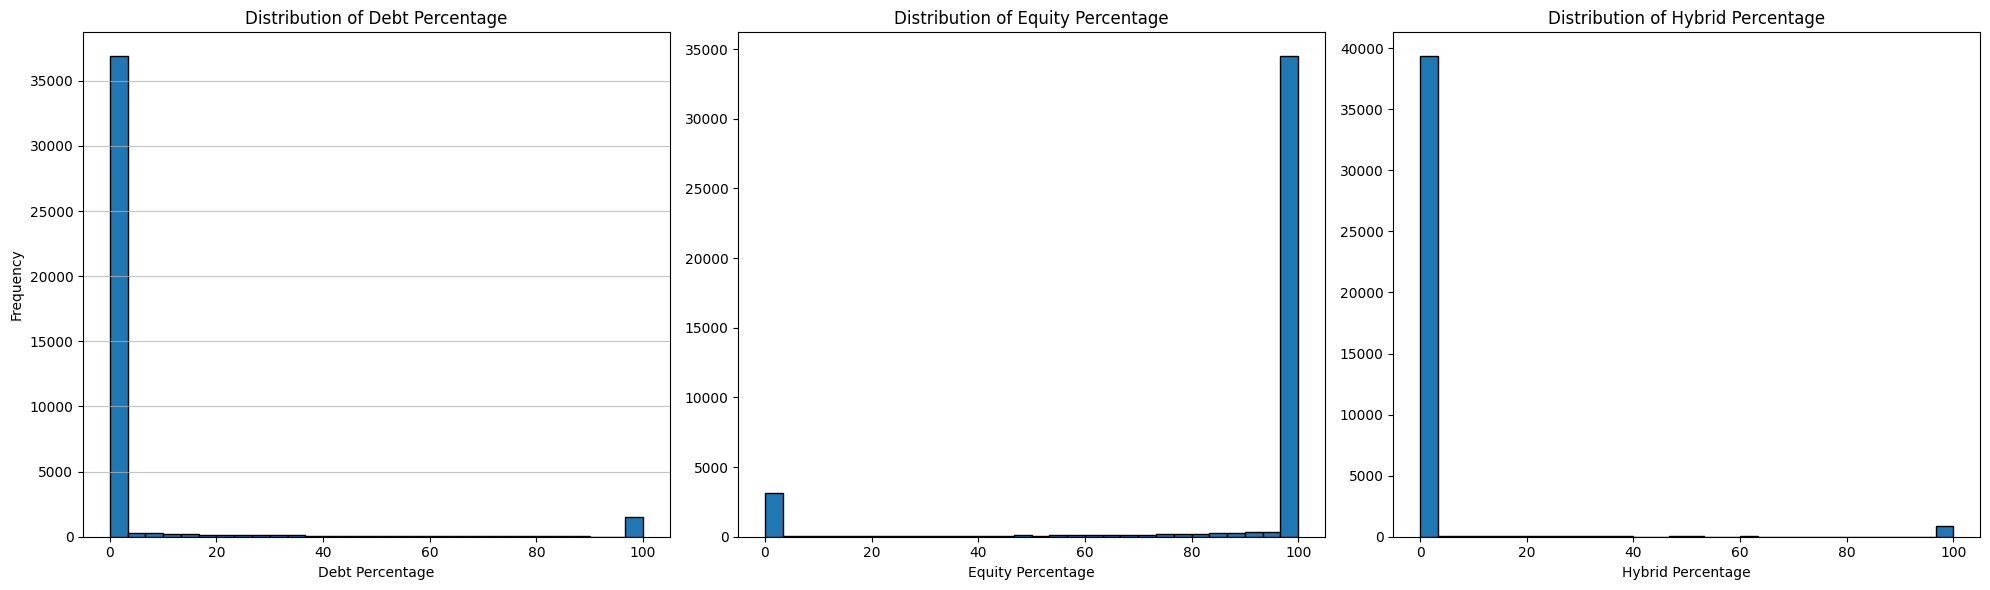

In [276]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.hist(df['Debt Percentage'], bins=30, edgecolor='black')
plt.title('Distribution of Debt Percentage')
plt.xlabel('Debt Percentage')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 3, 2)
plt.hist(df['Equity Percentage'], bins=30, edgecolor='black')
plt.title('Distribution of Equity Percentage')
plt.xlabel('Equity Percentage')

plt.subplot(1, 3, 3)
plt.hist(df['Hybrid Percentage'], bins=30, edgecolor='black')
plt.title('Distribution of Hybrid Percentage')
plt.xlabel('Hybrid Percentage')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


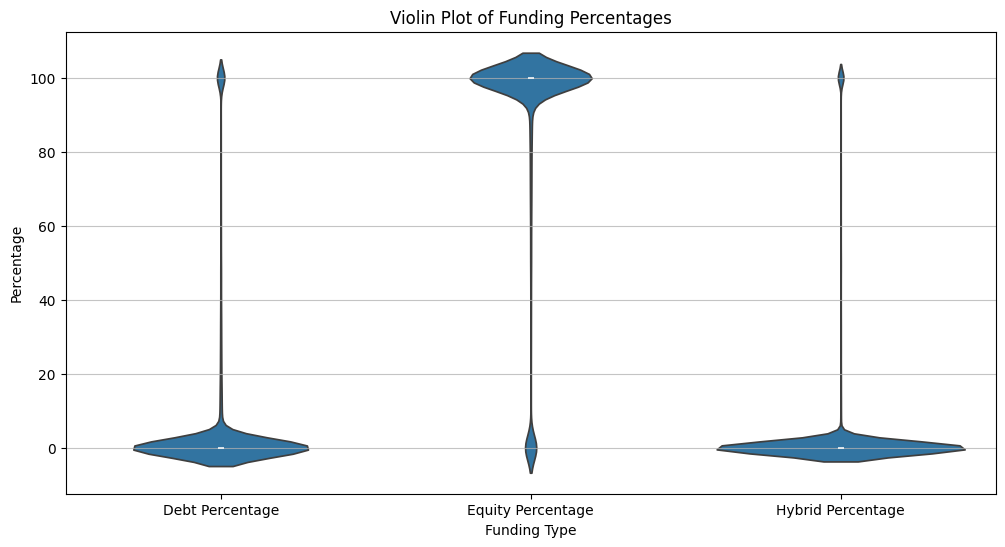

In [277]:
melted_df = df[['Debt Percentage', 'Equity Percentage', 'Hybrid Percentage']].melt(var_name='Funding Type', value_name='Percentage')

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Funding Type', y='Percentage', data=melted_df)
plt.title('Violin Plot of Funding Percentages')
plt.xlabel('Funding Type')
plt.ylabel('Percentage')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [278]:
df.groupby('status')[['Debt Percentage', 'Equity Percentage', 'Hybrid Percentage']].mean()

,Debt Percentage,Equity Percentage,Hybrid Percentage
status,,,
Not Specified,6.435102,80.400288,6.596792
acquired,4.447864,93.606067,0.780104
closed,4.010279,94.069420,1.479177
operating,5.618825,89.472054,2.831862


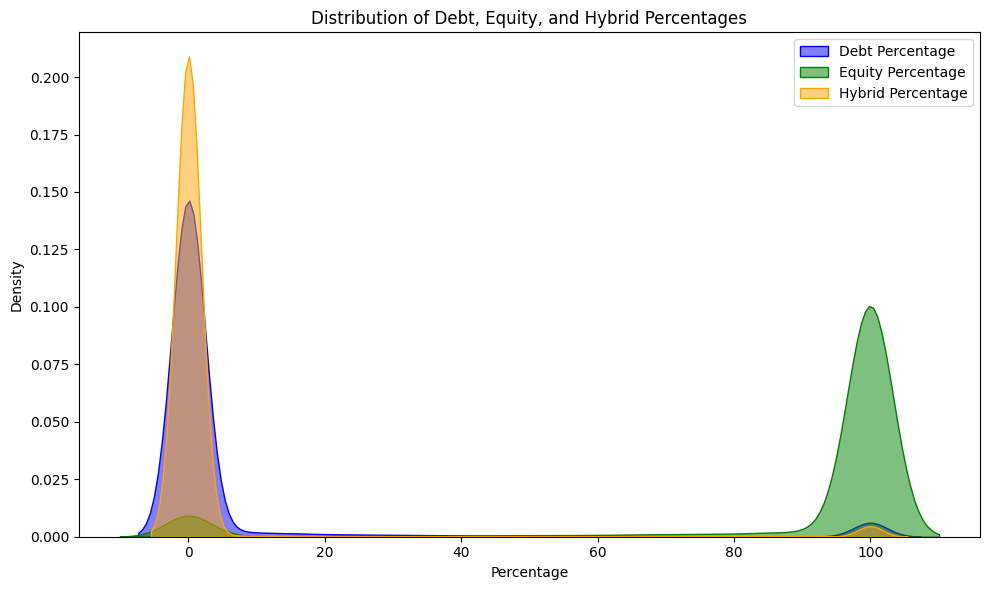

In [279]:
plt.figure(figsize=(10, 6))

# Plot each percentage distribution
sns.kdeplot(df['Debt Percentage'], label='Debt Percentage', color='blue', fill=True, alpha=0.5)
sns.kdeplot(df['Equity Percentage'], label='Equity Percentage', color='green', fill=True, alpha=0.5)
sns.kdeplot(df['Hybrid Percentage'], label='Hybrid Percentage', color='orange', fill=True, alpha=0.5)

# Add titles and labels
plt.title('Distribution of Debt, Equity, and Hybrid Percentages')
plt.xlabel('Percentage')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

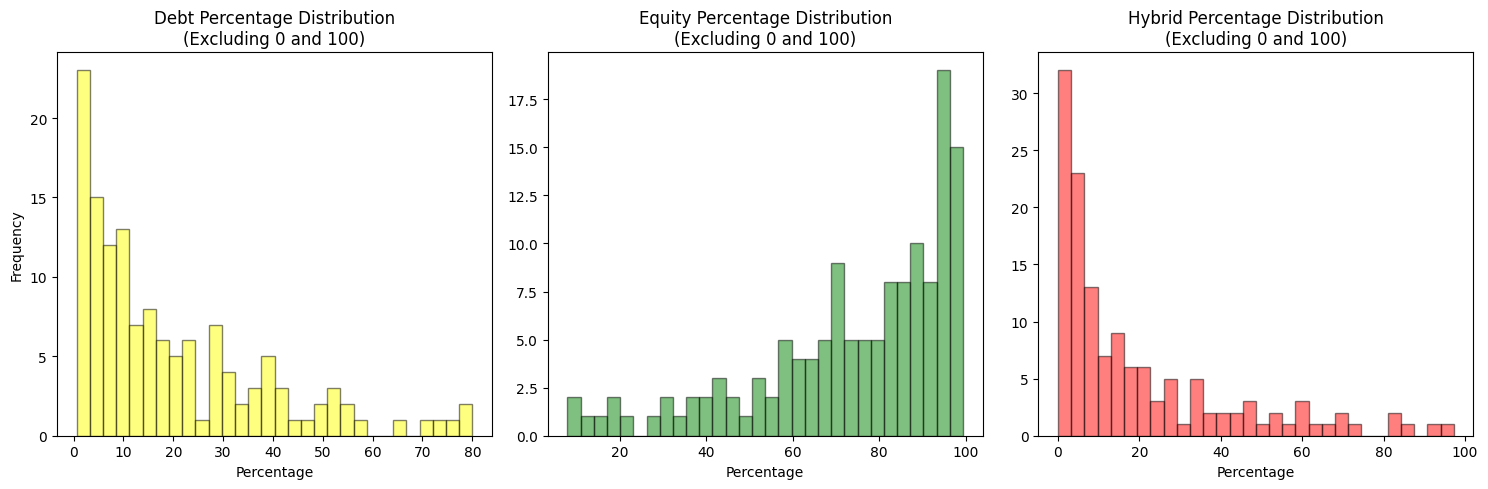

In [280]:
filtered_df = df[(df['Debt Percentage'] > 0) & (df['Debt Percentage'] < 100) &
                  (df['Equity Percentage'] > 0) & (df['Equity Percentage'] < 100) &
                  (df['Hybrid Percentage'] > 0) & (df['Hybrid Percentage'] < 100)]

plt.figure(figsize=(15, 5))

# Debt Percentage histogram
plt.subplot(1, 3, 1)
plt.hist(filtered_df['Debt Percentage'], bins=30, alpha=0.5,color='yellow', edgecolor='black')
plt.title('Debt Percentage Distribution\n(Excluding 0 and 100)')
plt.xlabel('Percentage')
plt.ylabel('Frequency')

# Equity Percentage histogram
plt.subplot(1, 3, 2)
plt.hist(filtered_df['Equity Percentage'], bins=30, alpha=0.5,color='green', edgecolor='black')
plt.title('Equity Percentage Distribution\n(Excluding 0 and 100)')
plt.xlabel('Percentage')

# Hybrid Percentage histogram
plt.subplot(1, 3, 3)
plt.hist(filtered_df['Hybrid Percentage'], bins=30, alpha=0.5,color='red', edgecolor='black')
plt.title('Hybrid Percentage Distribution\n(Excluding 0 and 100)')
plt.xlabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()


In [281]:
df.groupby('status')[['Debt Percentage', 'Equity Percentage', 'Hybrid Percentage']].value_counts()

status         Debt Percentage  Equity Percentage  Hybrid Percentage
Not Specified  0.000000         100.000000         0.000000             803
                                0.000000           0.000000              69
                                                   100.000000            59
               100.000000       0.000000           0.000000              45
               0.000000         100.000000         0.000000               9
                                                                       ... 
operating      97.872340        0.000000           2.127660               1
               98.342231        1.657769           0.000000               1
               99.309777        0.690223           0.000000               1
               99.586715        0.413285           0.000000               1
               99.809886        0.000000           0.190114               1
Name: count, Length: 3692, dtype: int64

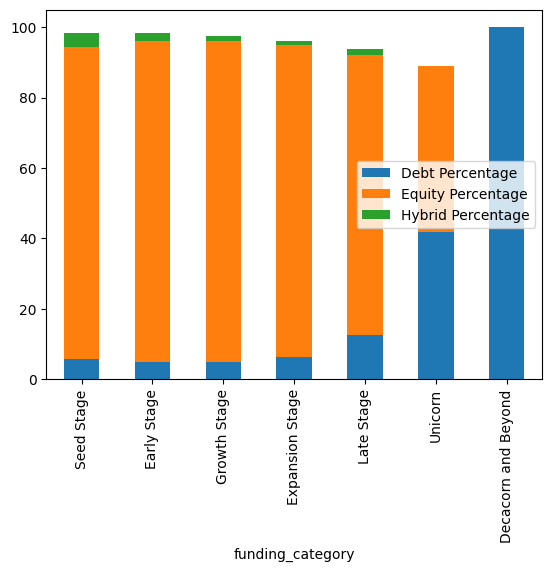

,count
funding_category,
Seed Stage,16326
Early Stage,14828
Growth Stage,7261
Expansion Stage,1467
Late Stage,993
Unicorn,31
Decacorn and Beyond,1


In [282]:
df.groupby('funding_category', observed=True)[['Debt Percentage', 'Equity Percentage', 'Hybrid Percentage']].mean().plot(kind='bar', stacked=True)
plt.show()
df['funding_category'].value_counts()

##Insights:

- **Debt Percentage:** Startups in earlier stages tend to have higher debt percentages, while later-stage startups and unicorns rely less on debt.
- **Equity Percentage:** Equity is the dominant financing source across all funding categories, with the highest percentage in the "Unicorn" category.
- **Hybrid Percentage:** Hybrid financing is used sparingly across all categories, with the highest usage in the "Seed Stage" and "Early Stage" categories.
- **Funding Category Distribution:** The "Seed Stage" and "Early Stage" categories have the highest number of startups, followed by "Growth Stage" and "Expansion Stage."

####Top Markets with 100% Equity Ownership:

In [283]:
df[df['Equity Percentage']==100]['market'].value_counts().head(10)

,count
market,
Software,3408
Biotechnology,2461
Not Specified,2060
Mobile,1454
E-Commerce,1277
Curated Web,1189
Enterprise Software,960
Games,852
Clean Technology,821


####Top Markets with 100% Debt Ownership:

In [284]:
df[df['Debt Percentage']==100]['market'].value_counts().head(10)

,count
market,
Biotechnology,227
Not Specified,170
Software,168
Health and Wellness,67
Hardware + Software,47
Manufacturing,43
Clean Technology,42
Mobile,42
Curated Web,40


####Top Countries with 100% Debt Ownership:

In [285]:
df[df['Debt Percentage']==100]['country_code'].value_counts().head()

,count
country_code,
USA,1309
Not Specified,64
CAN,37
GBR,24
ISR,15


####Top Countries with 100% Equity Ownership:

In [286]:
df[df['Equity Percentage']==100]['country_code'].value_counts().head()

,count
country_code,
USA,19199
Not Specified,3369
GBR,1825
CAN,970
CHN,915


In [287]:
df[df['grant'] >0]['market'].value_counts().head(10)

,count
market,
Biotechnology,154
Education,106
Not Specified,102
Software,64
Nonprofits,46
Clean Technology,42
Health Care,42
Mobile,35
Health and Wellness,24


In [288]:
df[df['Hybrid Percentage'] == 100 ]['market'].value_counts().head(10)

,count
market,
Not Specified,107
Education,98
Biotechnology,58
Software,51
Nonprofits,40
Health and Wellness,28
Clean Technology,25
Health Care,22
Mobile,21


###Insights:
- The Biotechnology sector leads significantly with 154 companies receiving grants, reflecting its crucial dependence on non-dilutive funding for research and innovation.

- Education (106) and Nonprofits (46) also show substantial grant funding, indicating a strong focus on social impact and public good initiatives.

- The presence of Clean Technology (42) and Health Care (42) markets highlights growing investment in sustainable solutions and healthcare innovations.

In [289]:
df[df['undisclosed percentage'] == 100 ].shape[0]

600

In [290]:
df[df['undisclosed percentage'] > 0 ].shape[0]

952

###Insights:
- Out of the total records, 952 have some undisclosed funding, while 600 have 100% undisclosed funding, highlighting a need for caution in interpreting funding data and its implications for analysis.


In [291]:
df.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'funding_category', 'Debt Percentage', 'Equity Percentage',
       'Hybrid Percentage', 'undisclosed percentage'],
      dtype='object')

In [292]:
df.groupby('market')[['funding_total_usd','seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H']].mean().sort_values(ascending=False, by='funding_total_usd').head(20)

,funding_total_usd,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
market,,,,,,,,,,,,,,,,,,,,,,
Natural Gas Uses,400.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,400.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Film Production,262.675000,0.175000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,262.500000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Oil and Gas,235.522543,0.133750,0.000000,0.55875,0.000000,0.0,5.000000,0.000000,0.000000,211.080043,18.750000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Trading,160.085200,0.166152,0.782911,0.00000,0.006818,0.0,0.000000,0.008864,0.029545,159.090909,0.000000,0.000000,0.0,0.0,0.012955,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Content Creators,136.467500,1.047500,10.250000,0.00000,0.004375,0.0,0.162500,0.003125,0.000000,0.000000,125.000000,0.000000,0.0,0.0,2.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Solar,128.929491,0.123080,48.068982,0.01742,0.000000,0.0,9.865742,0.000000,16.470667,53.503600,0.000000,0.880000,0.0,0.0,2.919095,2.496000,11.300000,13.100000,9.080000,0.000000,0.00000,0.0
Recreation,128.660000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,128.660000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
Development Platforms,125.855534,0.461191,6.500901,0.00000,0.000000,0.0,118.486842,0.143442,0.000000,0.263158,0.000000,0.000000,0.0,0.0,0.815789,1.421053,2.105263,0.000000,0.000000,0.000000,0.00000,0.0
Custom Retail,119.657790,0.000000,119.657790,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0


In [293]:
df.groupby('market')[['funding_total_usd','seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H']].mean().sort_values(ascending=False, by='funding_total_usd').tail(20)

,funding_total_usd,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
market,,,,,,,,,,,,,,,,,,,,,,
Swimming,0.104000,0.000000,0.00,0.104,0.00,0.0,0.0,0.0000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Entertainment,0.100000,0.000000,0.00,0.000,0.00,0.0,0.0,0.1000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
College Campuses,0.100000,0.100000,0.00,0.000,0.00,0.0,0.0,0.0000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Musical Instruments,0.100000,0.100000,0.00,0.000,0.00,0.0,0.0,0.0000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Moneymaking,0.100000,0.100000,0.00,0.000,0.00,0.0,0.0,0.0000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Google Glass,0.100000,0.000000,0.00,0.000,0.00,0.0,0.0,0.1000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New Technologies,0.100000,0.070000,0.00,0.000,0.00,0.0,0.0,0.0000,0.03,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Local Coupons,0.087500,0.070000,0.00,0.000,0.00,0.0,0.0,0.0175,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
New Product Development,0.060000,0.060000,0.00,0.000,0.00,0.0,0.0,0.0000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [294]:
df.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_month', 'founded_quarter', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'funding_category', 'Debt Percentage', 'Equity Percentage',
       'Hybrid Percentage', 'undisclosed percentage'],
      dtype='object')

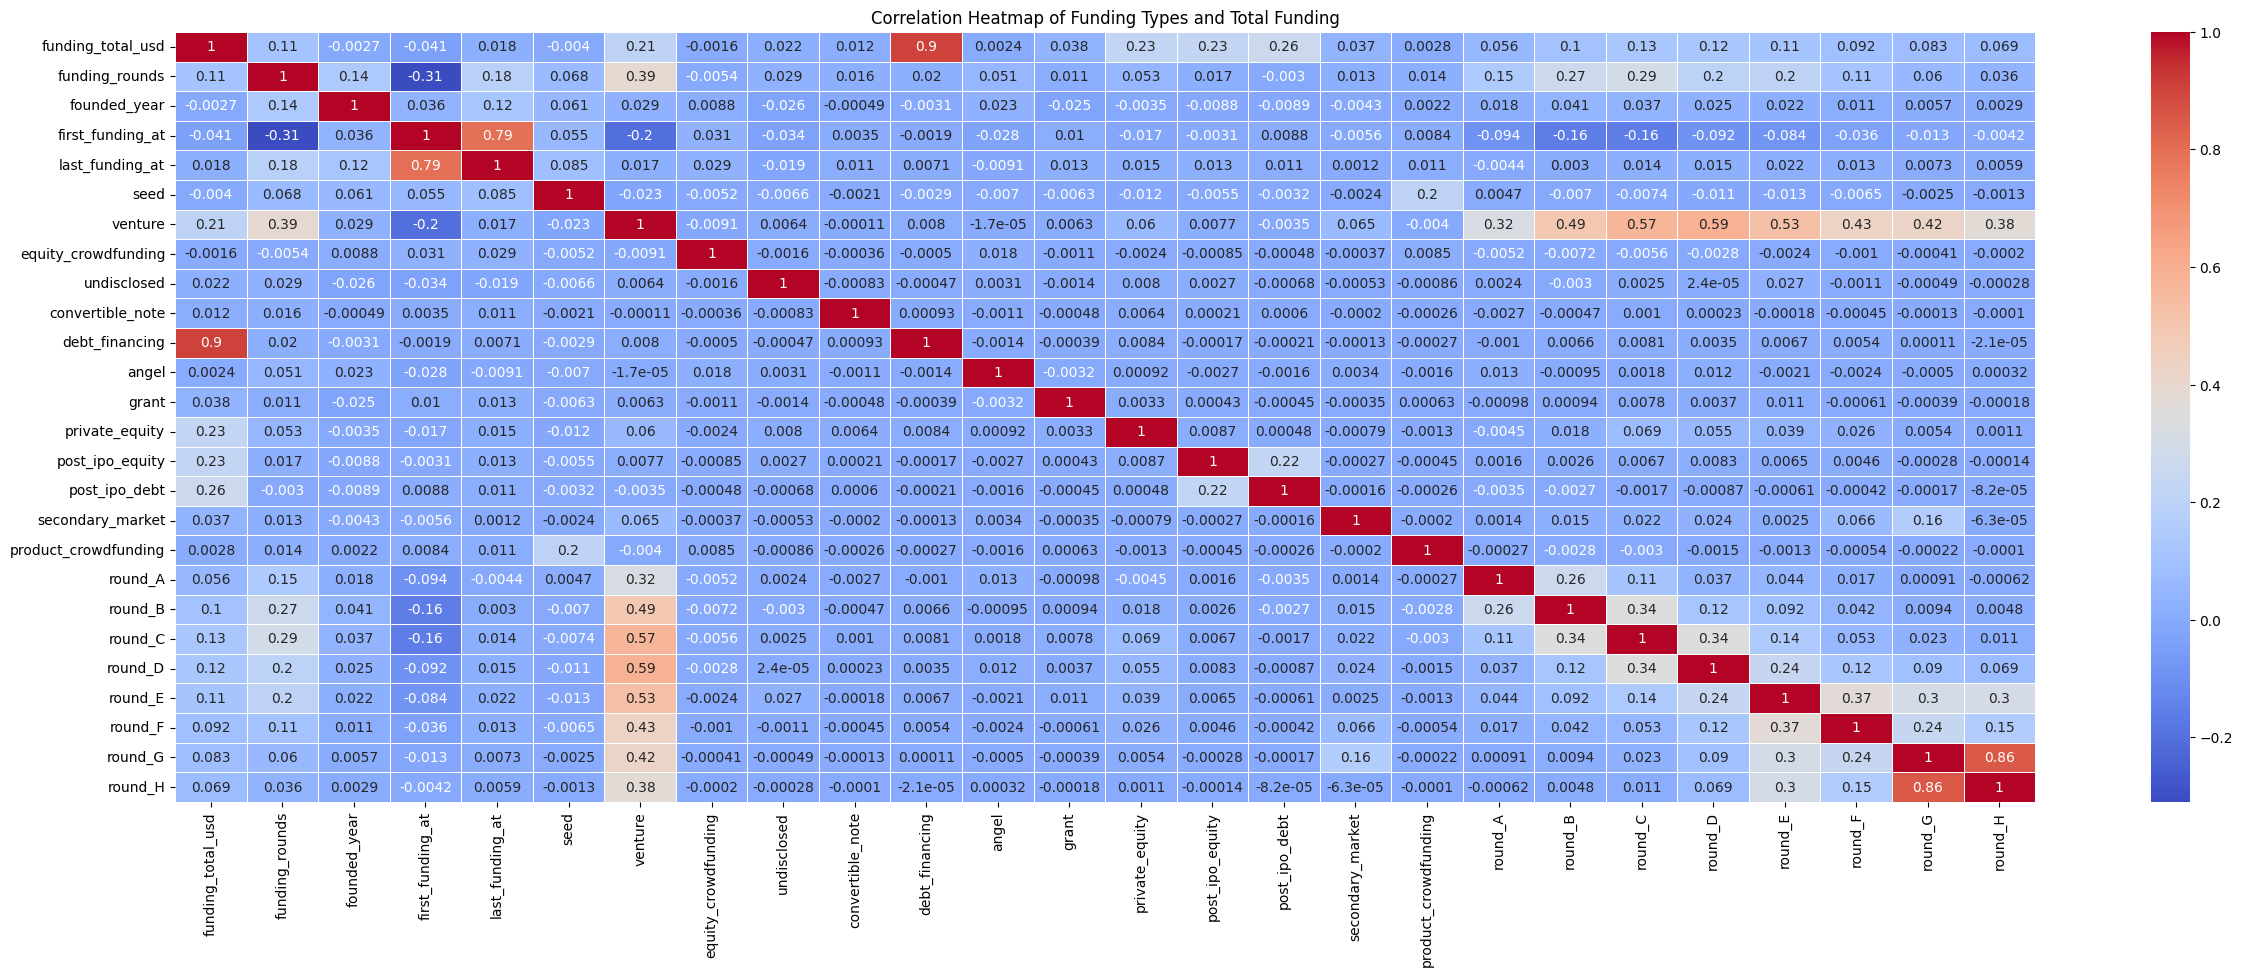

In [295]:
# Select only numerical columns for correlation calculation
df_corr = df[['funding_total_usd','funding_rounds', 'founded_year',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H']].corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(30, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Funding Types and Total Funding')
plt.show()


###Insights:
- Debt Financing Correlation: A strong positive correlation (0.90) exists between debt financing and total funding, indicating that increased debt financing typically leads to higher funding amounts.

- Funding Rounds: Funding rounds have a weak positive correlation (0.11) with total funding, suggesting that more rounds may slightly boost overall funding.

- Seed Funding: A negative correlation (-0.21) between seed funding and total funding indicates that startups receiving seed funding may not secure larger overall amounts, as seed investments are generally smaller.

- Equity Crowdfunding: A negligible negative correlation (-0.006) suggests that equity crowdfunding does not significantly impact total funding.

- Funding Stage Variations: Correlations vary among rounds A, B, and C, indicating differing contributions to total funding based on the funding stage.

In [296]:
df.groupby('funding_rounds')[['funding_total_usd','seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H']].mean().sort_values(ascending=False, by = 'round_B')

,funding_total_usd,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
funding_rounds,,,,,,,,,,,,,,,,,,,,,,
11,282.219524,0.177639,178.354618,0.000000,0.014286,0.128571,30.470001,0.439000,3.617143,67.424011,1.594254,0.000000,0.000000,0.000000,4.535493,14.811563,28.561319,26.051802,26.486962,8.857143,30.571012,18.571429
10,138.331329,0.420070,86.557893,0.000000,1.574561,0.046884,29.904703,0.238000,0.852326,10.948484,6.303739,0.002110,1.482558,0.000000,3.674422,11.004495,13.951192,18.351288,16.433705,5.483721,0.000000,0.000000
8,114.419277,0.673374,77.571498,0.000000,0.612323,0.145570,11.758927,0.115784,2.101684,18.008936,0.091612,0.230263,2.631579,0.477728,4.052713,10.864472,11.222797,10.752983,8.286678,14.217423,3.513158,0.000000
9,143.382976,0.328671,81.216364,0.014881,0.488948,0.571293,23.979969,0.160507,0.928185,32.967610,2.286071,0.440476,0.000000,0.000000,2.938230,10.632089,14.689555,13.909692,8.965099,5.819048,6.952600,0.000000
15,72.899942,0.335000,59.888589,0.000000,3.750000,0.000000,1.162755,7.763598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,10.000000,5.500000,5.000000,15.500000,5.000000,0.000000,0.000000
6,71.909360,0.498218,53.881307,0.010777,0.311047,0.097292,5.436929,0.130255,0.180030,5.627756,5.602847,0.107720,0.024975,0.000206,3.971914,9.506989,11.387608,13.367399,5.181524,2.602332,0.034650,0.000000
7,73.328696,0.364693,59.542053,0.000198,0.913391,0.155523,4.846856,0.221097,0.136398,5.297388,1.640780,0.210317,0.000000,0.000000,4.705446,8.767011,11.478483,10.888717,8.295414,4.881938,0.361447,0.000000
5,78.136476,0.399465,37.577627,0.001960,0.266111,0.065264,32.709303,0.111252,0.084865,5.257556,1.183394,0.330631,0.146847,0.002202,3.726397,7.503595,8.388165,6.872959,2.865539,0.878762,0.183183,0.000000
14,42.611882,0.000000,35.073387,0.000000,0.000000,0.987500,6.050994,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,7.500000,8.750000,0.000000,0.000000,0.000000,0.000000,0.000000


Insights:
- More Funding Rounds = Higher Total Funding: Startups with more funding rounds secure significantly larger total funding amounts, with 11 rounds averaging  282.22M,12roundsaveraging 215.97M, 18 rounds averaging $212.81M and so on.
- Venture Funding Dominates Later Rounds: Venture funding becomes increasingly prevalent in rounds 11-18, playing a key role in scaling startups.
- Private equity steadily increases from rounds 1 to 13, indicating its importance in mid-stage funding, but it is completely absent in the later stages (rounds 14, 15, 16, and 18), suggesting other funding mechanisms dominate at those stages.

##Recommendation:
####For Entrepreneurs:
- Pursue grant opportunities, as they provide non-repayable funds and do not dilute equity, allowing you to retain more ownership of your startup.
- Combine different funding types, such as seed funding, venture capital, and crowdfunding, to create a balanced capital structure that mitigates risks and enhances financial stability.
- Plan your funding rounds strategically based on your growth stages. Ensure each round aligns with specific milestones to attract investors effectively.
- Aim to disclose funding sources when possible to build credibility with investors, stakeholders, and customers. Transparency can enhance trust and facilitate better relationships.

####For Investors:
- Renewable Energy and Sustainability: Invest in Solar and Batteries sectors, which show strong funding and growth potential as the world shifts toward sustainable energy solutions.
- Healthcare Innovation: The Physicians and Hospitals sectors are receiving consistent funding, making healthcare technology and services promising areas for investment.

- Content and Media: Consider the Content Creators and Film Production sectors, which are benefiting from increasing demand for digital content and media production, offering lucrative opportunities for investors.
- Keep abreast of any regulatory changes that might impact funding dynamics in specific sectors. Being informed can help investors make timely decisions and navigate potential risks effectively.